In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

# Define the grid
def create_grid(nx, xmin, xmax):
    x = np.linspace(xmin, xmax, nx)
    dx = (xmax - xmin) / (nx - 1)
    return x, dx

# Define the FTCS method
def ftcs(nt, nx, u0, C):
    u = np.zeros((nt, nx))
    u[0] = u0.copy()
    for n in range(nt-1):
        u[n+1, 1:-1] = u[n, 1:-1] - (C/2) * (u[n, 2:] - u[n, :-2])
    return u

# Define the upwind method
def upwind(nt, nx, u0, C):
    u = np.zeros((nt, nx))
    u[0] = u0.copy()
    for n in range(nt-1):
        u[n+1, 1:-1] = u[n, 1:-1] - C * (u[n, 1:-1] - u[n, :-2])
    return u

# Define the Crank-Nicolson method
def crank_nicolson(nt, nx, u0, C):
    u = np.zeros((nt, nx))
    u[0] = u0
    
    a = (-C/4) * np.ones(nx - 1)
    b =  np.ones(nx)
    c = (C/4) * np.ones(nx - 1)
    
    for n in range(nt - 1):
        d = u[n, 1:-1] - C/4 * (u[n, 2:] - u[n, :-2])
        A = np.diag(a, -1) + np.diag(b) + np.diag(c, 1)
        u[n + 1, 1:-1] = np.linalg.solve(A[1:-1, 1:-1], d)
    
    return u

# Define the plot function
def plot_solution(x, u0, u_numerical, u_analytic, C):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.ravel()

    for i, C_val in enumerate(C):

        axs[i].plot(x, u0, '--', label='Initial Condition')
        axs[i].plot(x, u_analytic[i], '--', label='Analytic Solution')
        axs[i].plot(x, u_numerical[i][-1], label='Numerical Solution')
        axs[i].set_xlim([xmin, xmax])
        axs[i].set_xlabel("x")
        axs[i].set_ylabel("u")
        axs[i].set_title(f'Solution (C={C_val})')
        axs[i].legend()

    plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

# Ορισμός του πλέγματος
def create_grid(nx, xmin, xmax):
    x = np.linspace(xmin, xmax, nx)
    dx = (xmax - xmin) / (nx - 1)
    return x, dx

# Ορισμός της μεθόδου FTCS
def ftcs(nt, nx, u0, C):
    u = np.zeros((nt, nx))
    u[0] = u0.copy()
    for n in range(nt-1):
        u[n+1, 1:-1] = u[n, 1:-1] - (C/2) * (u[n, 2:] - u[n, :-2])
    return u

# Ορισμός της μεθόδου upwind
def upwind(nt, nx, u0, C):
    u = np.zeros((nt, nx))
    u[0] = u0.copy()
    for n in range(nt-1):
        u[n+1, 1:-1] = u[n, 1:-1] - C * (u[n, 1:-1] - u[n, :-2])
    return u

# Ορισμός της μεθόδου Crank-Nicolson
def crank_nicolson(nt, nx, u0, C):
    u = np.zeros((nt, nx))
    u[0] = u0
    
    a = (-C/4) * np.ones(nx - 1)
    b =  np.ones(nx)
    c = (C/4) * np.ones(nx - 1)
    
    for n in range(nt - 1):
        d = u[n, 1:-1] - C/4 * (u[n, 2:] - u[n, :-2])
        A = np.diag(a, -1) + np.diag(b) + np.diag(c, 1)
        u[n + 1, 1:-1] = np.linalg.solve(A[1:-1, 1:-1], d)
    
    return u

# Ορισμός της συνάρτησης για το γράφημα
def plot_solution(x, u0, u_numerical, u_analytic, C):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.ravel()

    for i, C_val in enumerate(C):

        axs[i].plot(x, u0, '--', label='Αρχική Συνθήκη')
        axs[i].plot(x, u_analytic[i], '--', label='Αναλυτική Λύση')
        axs[i].plot(x, u_numerical[i][-1], label='Αριθμητική Λύση')
        axs[i].set_xlim([xmin, xmax])
        axs[i].set_xlabel("x")
        axs[i].set_ylabel("u")
        axs[i].set_title(f'Λύση (C={C_val})')
        axs[i].legend()

    plt.show()


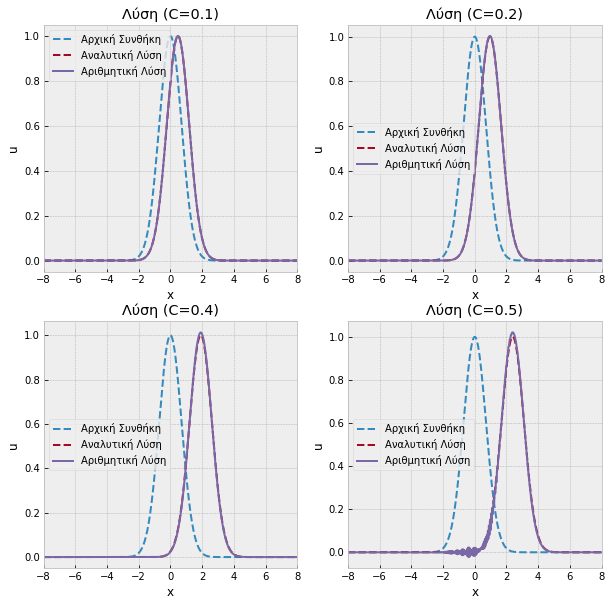

In [4]:
# Ορισμός των παραμέτρων
nx = 1000  # Αριθμός σημείων στο πλέγμα
xmin = -8  # Ελάχιστη τιμή του x
xmax = 8  # Μέγιστη τιμή του x
nt = 300  # Αριθμός χρονικών βημάτων
tstart = 0  # Αρχική χρονική στιγμή
tend = 3  # Τελική χρονική στιγμή
dt = (tend - tstart) / (nt - 1)  # Χρονικό βήμα
C_values = np.array([0.1, 0.2, 0.4, 0.5])  # Τιμές του C

x, dx = create_grid(nx, xmin, xmax)  # Δημιουργία του πλέγματος
u0 = np.exp(-x ** 2)  # Αρχική κατάσταση

# Υπολογισμός αναλυτικών λύσεων
u_analytic = np.exp(-(x - C_values[:, np.newaxis] * (dx / dt) * tend) ** 2)

# Δημιουργία λίστας αριθμητικών λύσεων με τη μέθοδο FTCS
u_numerical = [ftcs(nt, nx, u0, C) for C in C_values]

# Προβολή των λύσεων
plot_solution(x, u0, u_numerical, u_analytic, C_values)


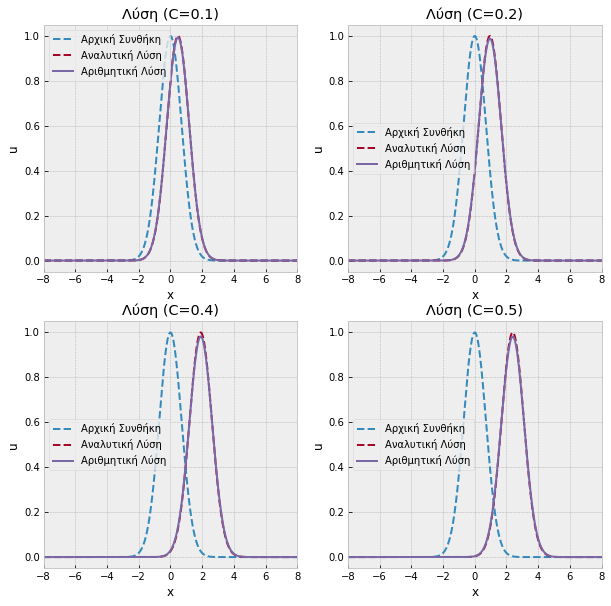

In [5]:
# Δημιουργία λίστας αριθμητικών λύσεων με τη μέθοδο Upwind
u_numerical = [upwind(nt, nx, u0, C) for C in C_values]

# Προβολή των λύσεων
plot_solution(x, u0, u_numerical, u_analytic, C_values)

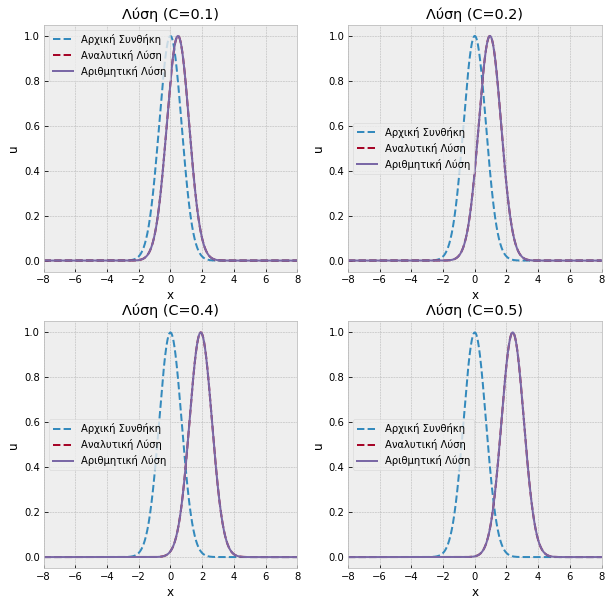

In [6]:
# Δημιουργία λίστας αριθμητικών λύσεων με τη μέθοδο Crank-Nicolson
u_numerical = [crank_nicolson(nt, nx, u0, C) for C in C_values]

# Προβολή των λύσεων
plot_solution(x, u0, u_numerical, u_analytic, C_values)


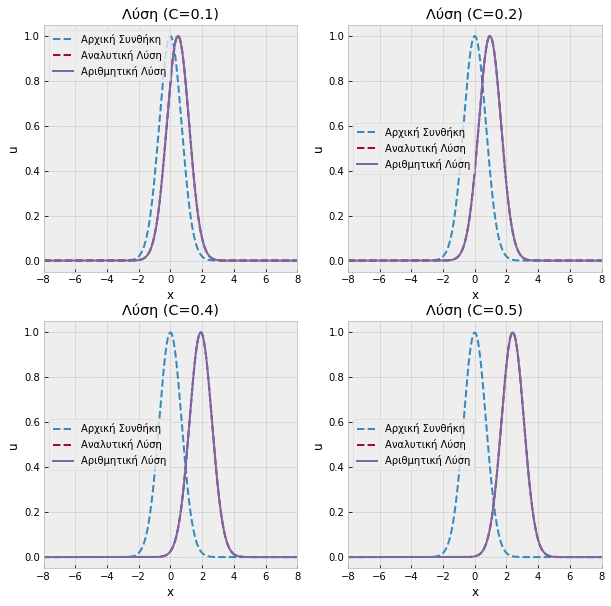

In [7]:
# Define the Lax-Wendroff method
def lax_wendroff(nt, nx, u0, C):
    u = np.zeros((nt, nx))
    u[0] = u0.copy()
    
    for n in range(nt - 1):
        u[n+1, 1:-1] = u[n, 1:-1] - (C/2) * (u[n, 2:] - u[n, :-2]) + (C**2/2) * (u[n, 2:] - 2*u[n, 1:-1] + u[n, :-2])
    
    return u

# Compute the numerical solutions using the Lax-Wendroff method
u_numerical = [lax_wendroff(nt, nx, u0, C) for C in C_values]

# Plot the solutions
plot_solution(x, u0, u_numerical, u_analytic, C_values)
